# 3. 神經網路

我們終於要開始做生命中第一個神經網路...

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. 讀入我們的 MNIST

### 1.1 由 TensorFlow 讀入 MNIST

這次是快速版本。

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 1.2 來看看資料內容

In [5]:
n = 9487

In [6]:
X = x_train[n]

In [7]:
X.shape

(28, 28)

正確答案: 1


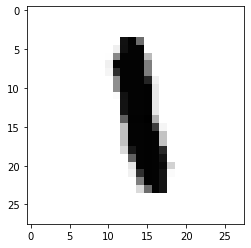

In [8]:
plt.imshow(X, cmap='Greys')
print('正確答案:', y_train[n])

### 1.3 輸入資料整理

In [9]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

### 1.3 輸出資料整理

In [10]:
y_train = tf.keras.utils.to_categorical(y_train,10)

In [11]:
y_test = tf.keras.utils.to_categorical(y_test,10)

## 2. 打造第一個神經網路

這裡我們用的是 Keras 2!

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [13]:
model = Sequential()

In [14]:
model.add(Dense(250, input_dim=784, activation='relu'))

In [15]:
model.add(Dense(250, activation='relu'))

In [16]:
model.add(Dense(10, activation='softmax'))

### 1.4 Compile

In [17]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

## 1.5 學習!

In [18]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1310 - accuracy: 0.3428
Epoch 2/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1070 - accuracy: 0.4635
Epoch 3/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0942 - accuracy: 0.5278
Epoch 4/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0899 - accuracy: 0.5496
Epoch 5/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0892 - accuracy: 0.5529
Epoch 6/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0884 - accuracy: 0.5573
Epoch 7/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0873 - accuracy: 0.5627
Epoch 8/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0873 - accuracy: 0.5626
Epoch 9/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0886 - accuracy: 0.5563
Epoch 10/20
60

## 2. 試用我們的結果

In [19]:
from ipywidgets import interact_manual

In [20]:
result = model.predict_classes(x_test)

In [23]:
def 辨識(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap="Greys")
    print("神經網路判斷為:", result[測試編號])

In [24]:
interact_manual(辨識, 測試編號 = (0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

## 3. 訓練好的神經網路存起來!

In [25]:
model_json = model.to_json()
open('handwriting_model_architecture.json', 'w').write(model_json)
model.save_weights('handwriting_model_weights.h5')